<a href="https://colab.research.google.com/github/Sailex-Salam/Meitei-Mayek/blob/main/Manipuri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.models import load_model

# Load model from HDF5 file
model = load_model('/content/drive/MyDrive/Models/Mepoch20.h5')

In [ ]:
img = cv2.imread('/content/drive/MyDrive/new/20250406_160201.jpg')
img = cv2.resize(img, (128, 128))
img = img / 255.0  # Normalize if model was trained with normalization
img = np.expand_dims(img, axis=0)  # Add batch dimension (1, 120, 120, 3)
img.shape

(1, 128, 128, 3)

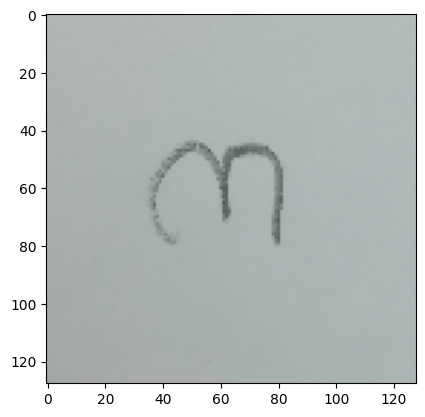

In [ ]:
plt.imshow(img[0])

In [ ]:
# Map indices to characters using a list
meetei_mayek_chars = [
    'ꯀ', 'ꯁ', 'ꯂ', 'ꯃ', 'ꯄ', 'ꯅ', 'ꯆ', 'ꯇ', 'ꯈ', 'ꯉ',
    'ꯊ', 'ꯋ', 'ꯌ', 'ꯍ', 'ꯎ', 'ꯏ', 'ꯐ', 'ꯑ', 'ꯒ', 'ꯓ',
    'ꯔ', 'ꯕ', 'ꯖ', 'ꯗ', 'ꯘ', 'ꯙ', 'ꯚ','꯱','꯲','꯳','꯴','꯵','꯶','꯷','꯸','꯹','0'
]

# Get prediction
prediction = model.predict(img)
s = prediction[0]

# Print index, value (rounded), and character
for i, val in enumerate(s):
    print(f"Index: {i:2d} | Accuracy: {val:.4f} | Char: {meetei_mayek_chars[i]}")

# Get index of max accuracy
k = np.argmax(s)

# Print predicted character
print(f"\nPredicted Character: {meetei_mayek_chars[k]} \nIndex: {k}, Accuracy: {s[k]:.4f}")
